<a href="https://colab.research.google.com/github/RodrigoSainz/tiokusz/blob/master/DS_C3_SC1_RodrigoMarcelSainzPereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [3]:
df = pd.read_csv("Happyness.csv")
print(df)

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

3. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [4]:
mexico_df = df[df['Country or region'] == 'Mexico'].set_index('Country or region')


In [5]:
print (mexico_df)

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


In [ ]:
4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

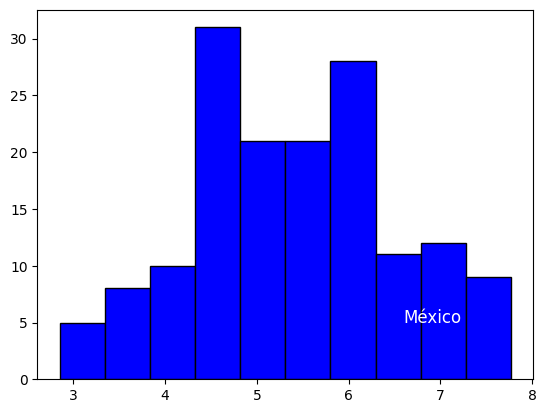

In [6]:
plt.hist(df['Score'], bins=10, color='blue', edgecolor='black')
# Agrega una etiqueta de texto para el valor de México
plt.text(mexico_df['Score'], 5, 'México', fontsize=12, color='white')

# Muestra el histograma
plt.show()

5. Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

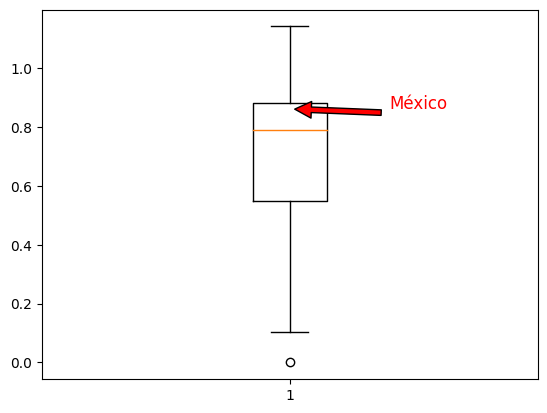

In [7]:
plt.boxplot(df['Healthy life expectancy'])

# Agrega una anotación para el valor de México
plt.annotate('México', xy=(1, mexico_df['Healthy life expectancy']), xytext=(1.2, mexico_df['Healthy life expectancy']), fontsize=12, color='red', arrowprops=dict(facecolor='red', shrink=0.05))

# Muestra el boxplot
plt.show()

6. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.


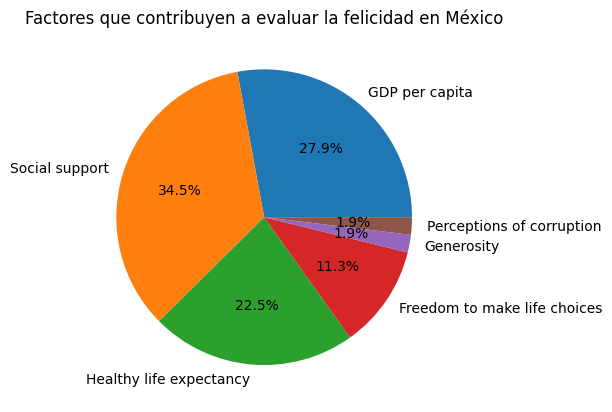

In [8]:
factor_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Extrae los valores de los factores para México
factor_values = mexico_df[factor_columns].values[0]

# Crea una gráfica circular para los factores
plt.pie(factor_values, labels=factor_columns, autopct='%1.1f%%')

# Agrega un título a la gráfica
plt.title('Factores que contribuyen a evaluar la felicidad en México')

# Muestra la gráfica
plt.show()

7. Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [9]:
# Encuentra el valor máximo y mínimo de la columna "Score"
max_score = df['Score'].max()
min_score = df['Score'].min()

# Encuentra los nombres de los países correspondientes al valor máximo y mínimo
max_country = df.loc[df['Score'] == max_score, 'Country or region'].iloc[0]
min_country = df.loc[df['Score'] == min_score, 'Country or region'].iloc[0]

# Imprime los nombres de los países correspondientes al valor máximo y mínimo
print('El país con el valor máximo de la columna "Score" es:', max_country)
print('El país con el valor mínimo de la columna "Score" es:', min_country)

El país con el valor máximo de la columna "Score" es: Finland
El país con el valor mínimo de la columna "Score" es: South Sudan


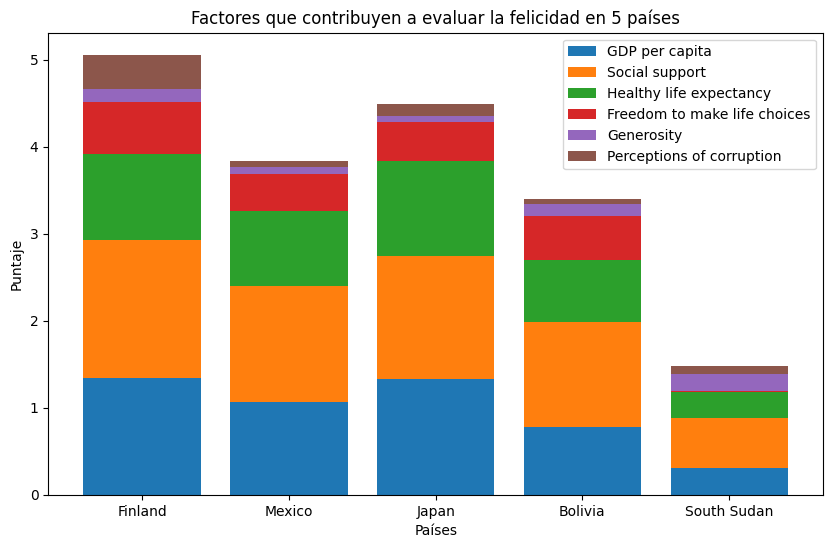

In [12]:
countries = ['Finland', 'South Sudan', 'Mexico', 'Bolivia', 'Japan']
df_filtered = df[df['Country or region'].isin(countries)]

# Crea una gráfica de barras para los 6 factores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_filtered['Country or region'], df_filtered['GDP per capita'], label='GDP per capita')
ax.bar(df_filtered['Country or region'], df_filtered['Social support'], bottom=df_filtered['GDP per capita'], label='Social support')
ax.bar(df_filtered['Country or region'], df_filtered['Healthy life expectancy'], bottom=df_filtered['GDP per capita'] + df_filtered['Social support'], label='Healthy life expectancy')
ax.bar(df_filtered['Country or region'], df_filtered['Freedom to make life choices'], bottom=df_filtered['GDP per capita'] + df_filtered['Social support'] + df_filtered['Healthy life expectancy'], label='Freedom to make life choices')
ax.bar(df_filtered['Country or region'], df_filtered['Generosity'], bottom=df_filtered['GDP per capita'] + df_filtered['Social support'] + df_filtered['Healthy life expectancy'] + df_filtered['Freedom to make life choices'], label='Generosity')
ax.bar(df_filtered['Country or region'], df_filtered['Perceptions of corruption'], bottom=df_filtered['GDP per capita'] + df_filtered['Social support'] + df_filtered['Healthy life expectancy'] + df_filtered['Freedom to make life choices'] + df_filtered['Generosity'], label='Perceptions of corruption')

# Agrega un título a la gráfica y etiquetas a los ejes
ax.set_title('Factores que contribuyen a evaluar la felicidad en 5 países')
ax.set_xlabel('Países')
ax.set_ylabel('Puntaje')

# Agrega una leyenda a la gráfica
ax.legend()

# Muestra la gráfica
plt.show()

8. Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación

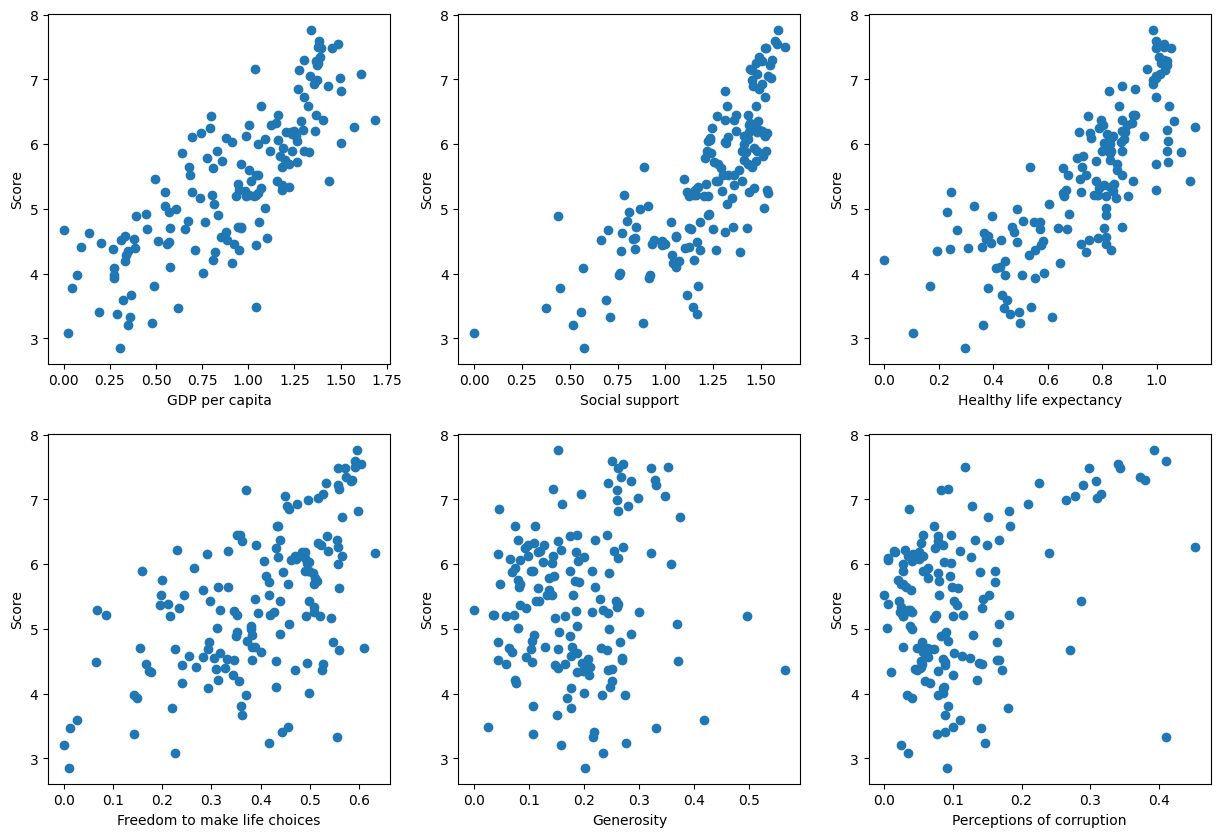

In [13]:

factor_columns1 = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for i, factor in enumerate(factor_columns1):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(df[factor], df['Score'])
    axs[row, col].set_xlabel(factor)
    axs[row, col].set_ylabel('Score')

# Muestra la matriz de subgráficas
plt.show()

Se puede ver que el grafico del GDP per capita, el apoyo social y la expectativa de vida son los que mayor correlacion tienen con el score

In [ ]:
9. Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

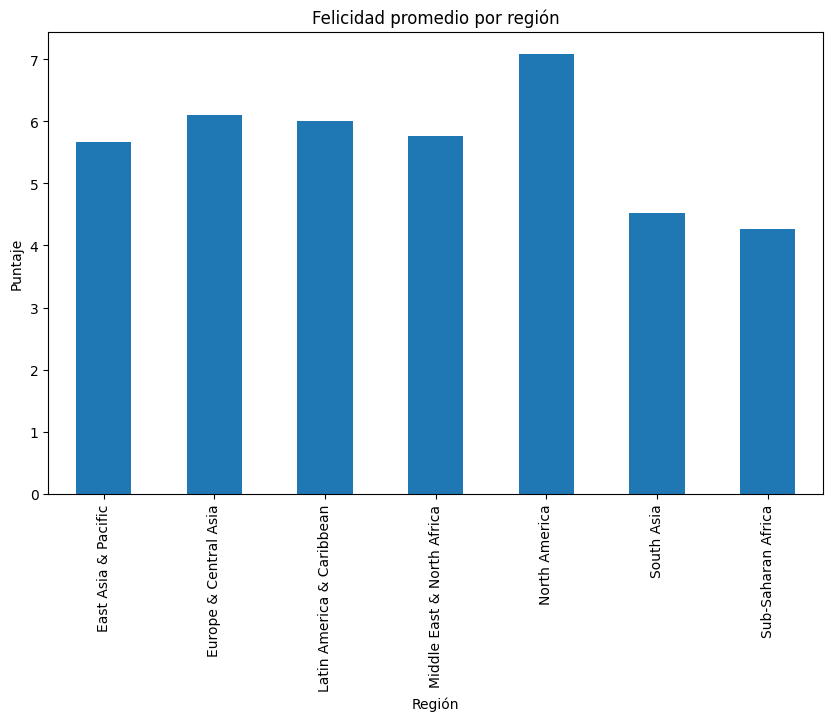

In [14]:
happiness_df = pd.read_csv('Happyness.csv')
metadata_df = pd.read_csv('metadata.csv')

# Combina los dataframes utilizando la columna "Country or region"
combined_df = pd.merge(happiness_df, metadata_df, left_on='Country or region', right_on='TableName')

# Agrupa los datos por región y calcula la felicidad promedio
region_grouped = combined_df.groupby('Region')['Score'].mean()

# Genera un gráfico de barras que muestra la felicidad promedio por región
region_grouped.plot(kind='bar', figsize=(10,6))

# Agrega un título a la gráfica y etiquetas a los ejes
plt.title('Felicidad promedio por región')
plt.xlabel('Región')
plt.ylabel('Puntaje')

# Muestra la gráfica
plt.show()